## Gráficas individuales por escenario

In [96]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from math import pi
import os
import seaborn as sns
# Diccionario de archivos y nombre del escenario
archivos = {
    "Escenario 1": "Es7_MejorResultado1Glaxomenortiempo.xlsx",
    "Escenario 2": "Es8_Mod1van.xlsx",
    "Escenario 3": "Esc9_CombinacionDA.xlsx",
    "Escenario 4": "Esc10_CombinacionDA_MejorResultado.xlsx"
}

# Columnas clave para el radar chart
columnas_radar = [
    'Espera_Promedio_min',
    'Espera_Maxima_min',
    'Uso_Capacidad_pct',
    'Costo_Promedio_USD',
    'Pct_Viajes_Llenos',
    'Pct_Cumple_Frecuencia'
]

# Colores personalizados
colores_barras = ['blue', 'skyblue']

# Loop para graficar cada escenario
for nombre_escenario, archivo in archivos.items():
    try:
        df = pd.read_excel(archivo, sheet_name="RESUMEN")
        estaciones = df["Estacion"]

        # 1. Tiempo de Espera
        fig1 = px.bar(df, x="Estacion", y=["Espera_Promedio_min", "Espera_Maxima_min"],
                      barmode='group', title=f"Tiempo de Espera - {nombre_escenario}",
                      text_auto=True, color_discrete_sequence=colores_barras)
        fig1.update_traces(textposition='outside')
        fig1.show()

        # 2. Uso de Unidades
        fig2 = px.bar(df, x="Estacion", y=["Uso_Capacidad_pct", "Pct_Viajes_Llenos"],
                      barmode='group', title=f"Uso de Unidades - {nombre_escenario}",
                      text_auto=True, color_discrete_sequence=colores_barras)
        fig2.update_traces(textposition='outside')
        fig2.show()

        # 3. Pastel de Viajes Llenos Promedio
        fig3 = px.pie(df, names="Estacion", values="Viajes_Llenos_Promedio",
                      title=f"Distribución de Viajes Llenos - {nombre_escenario}", hole=0.4)
        fig3.show()

        # 4. Costo promedio operativo
        # Crear gráfica de costo promedio operativo
        fig4= px.bar(
        df,
         x="Estacion",
        y="Costo_Promedio_USD",
        text="Costo_Promedio_USD",  # Mostrar el valor numérico en cada barra
        title="Costo Promedio Operativo - Escenario 1",
        color_discrete_sequence=["lightcoral"]
        )

# Ajustar etiquetas de texto
        fig4.update_traces(
        textposition='outside',
        textfont_size=14,
        textfont_color='black'
     )

# Etiquetas y formato
        fig4.update_layout(
         yaxis_title="Costo Promedio (USD)",
        xaxis_title="Estación",
        title_font_size=20
)

        fig4.show()

        # 6. Radar Chart
        df_radar = df.set_index("Estacion")[columnas_radar]
        df_radar_norm = (df_radar - df_radar.min()) / (df_radar.max() - df_radar.min())

        categorias = columnas_radar
        fig6 = go.Figure()
        for est in df_radar_norm.index:
            fig6.add_trace(go.Scatterpolar(
                r=df_radar_norm.loc[est].tolist() + [df_radar_norm.loc[est].tolist()[0]],
                theta=categorias + [categorias[0]],
                fill='toself',
                name=est
            ))
        fig6.update_layout(
            polar=dict(radialaxis=dict(visible=True)),
            title=f"Radar Chart - {nombre_escenario}",
            showlegend=True
        )
        fig6.show()

    except Exception as e:
        print(f"❌ Error en {nombre_escenario}: {e}")


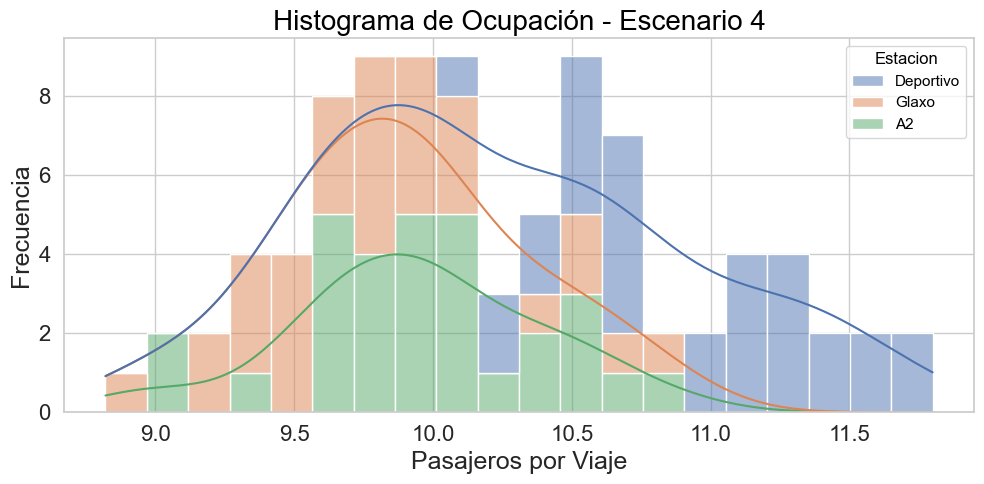

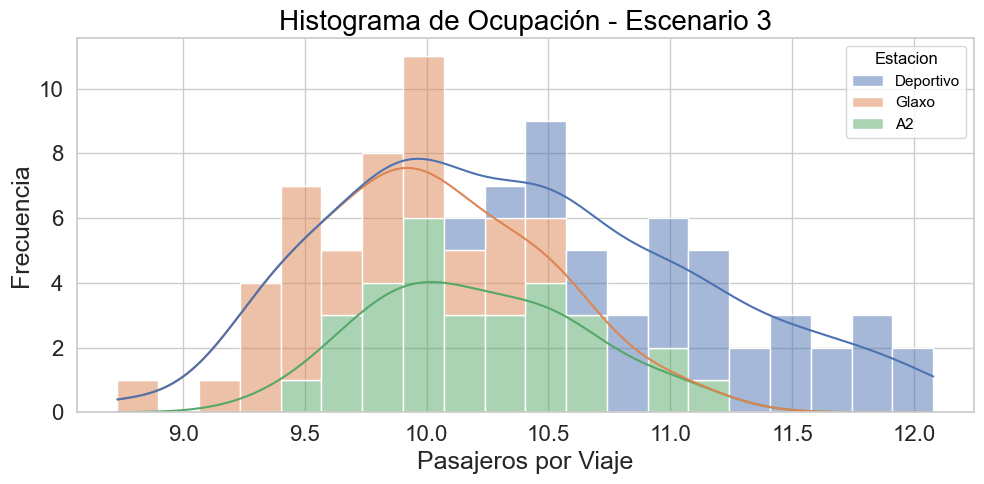

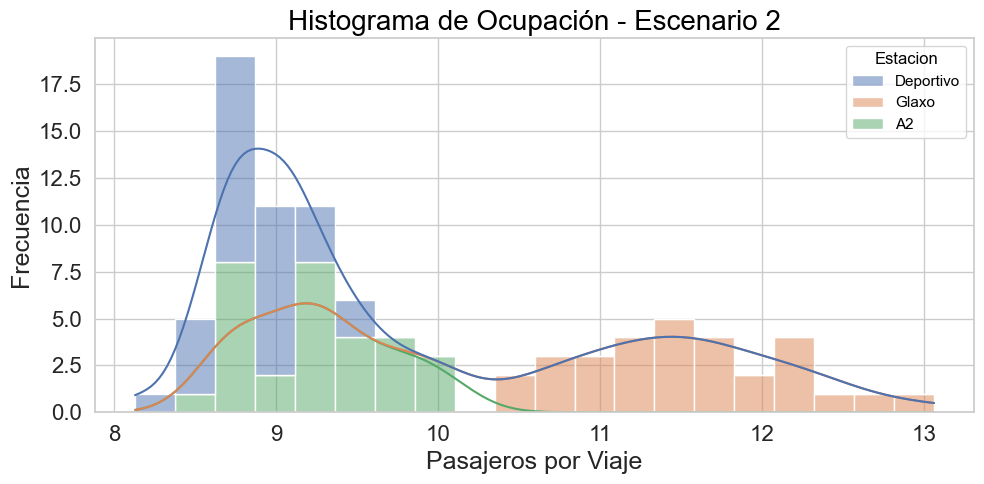

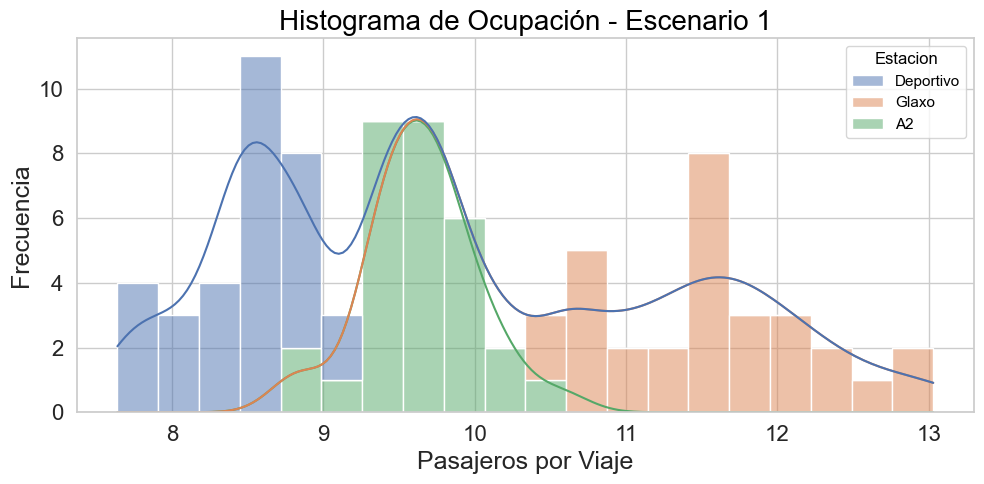

In [97]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Diccionario de nombres de archivo a escenarios
archivo_a_escenario = {
    "Es7_MejorResultado1Glaxomenortiempo.xlsx": "Escenario 1",
    "Es8_Mod1van.xlsx": "Escenario 2",
    "Esc9_CombinacionDA.xlsx": "Escenario 3",
    "Esc10_CombinacionDA_MejorResultado.xlsx": "Escenario 4"
}

# Carpeta donde están los archivos
carpeta = "."
archivos = [f for f in os.listdir(carpeta) if f in archivo_a_escenario]

# Inicializar dataframe total
df_ocupacion_total = pd.DataFrame()

# Cargar datos
for archivo in archivos:
    ruta = os.path.join(carpeta, archivo)
    xls = pd.ExcelFile(ruta)

    hojas_sim = [h for h in xls.sheet_names if h != "RESUMEN"]

    for hoja in hojas_sim:
        df = pd.read_excel(xls, sheet_name=hoja)

        if "Pasajeros_Transportados_Promedio" in df.columns:
            df["Estacion"] = hoja.split("_")[0]
            df["Escenario"] = archivo_a_escenario[archivo]
            df_ocupacion_total = pd.concat([df_ocupacion_total, df], ignore_index=True)

# Crear histogramas por escenario
escenarios_unicos = df_ocupacion_total["Escenario"].unique()

for escenario in escenarios_unicos:
    df_esc = df_ocupacion_total[df_ocupacion_total["Escenario"] == escenario]

    plt.figure(figsize=(10, 5))
    sns.histplot(data=df_esc, x="Pasajeros_Transportados_Promedio", hue="Estacion",
                 bins=20, kde=True, multiple="stack")
    plt.title(f"Histograma de Ocupación - {escenario}")
    plt.xlabel("Pasajeros por Viaje")
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Graficas DE los 4 ecenarios


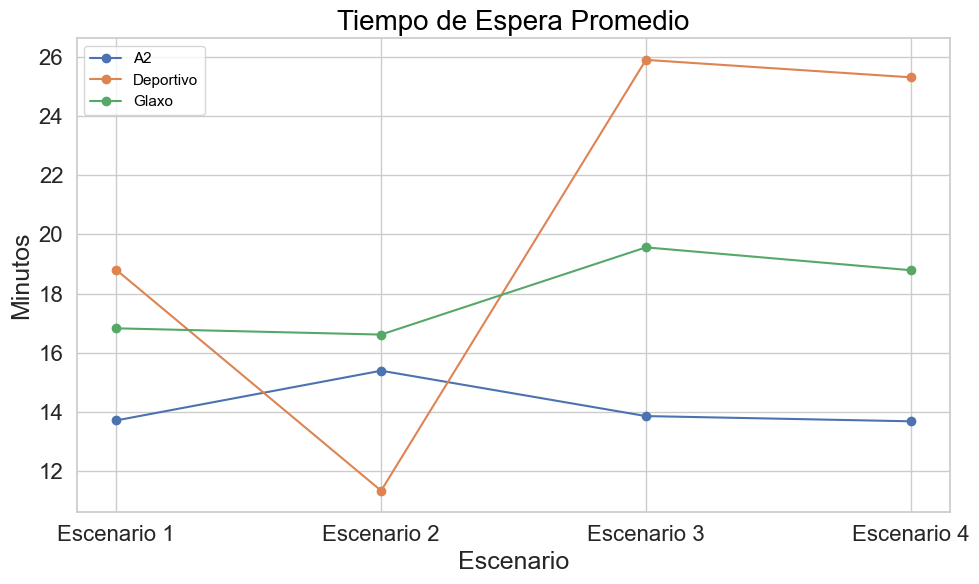

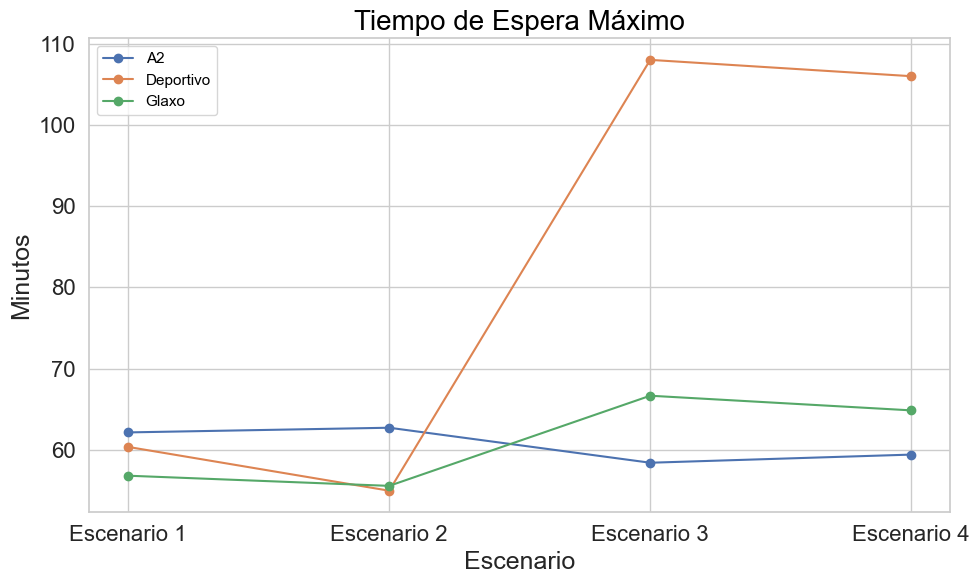

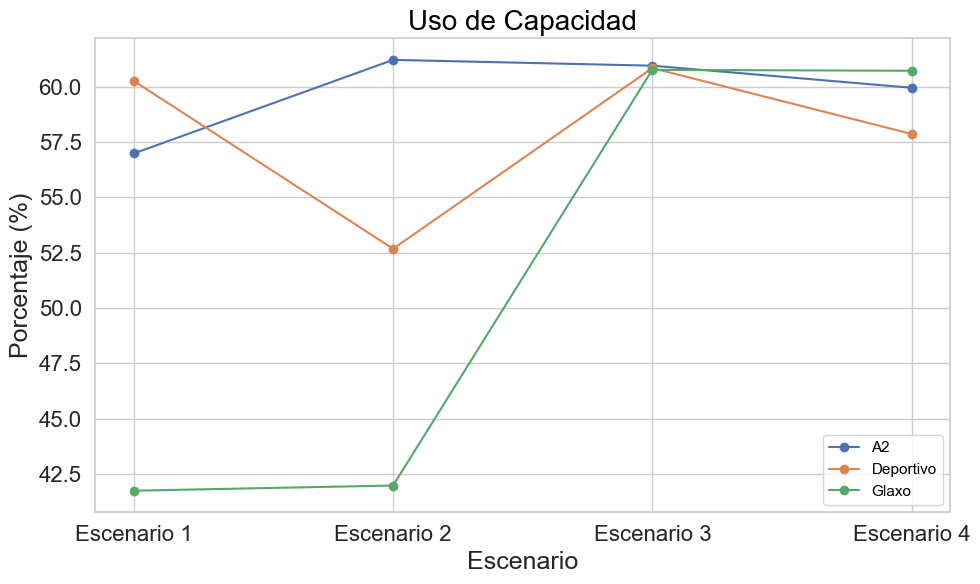

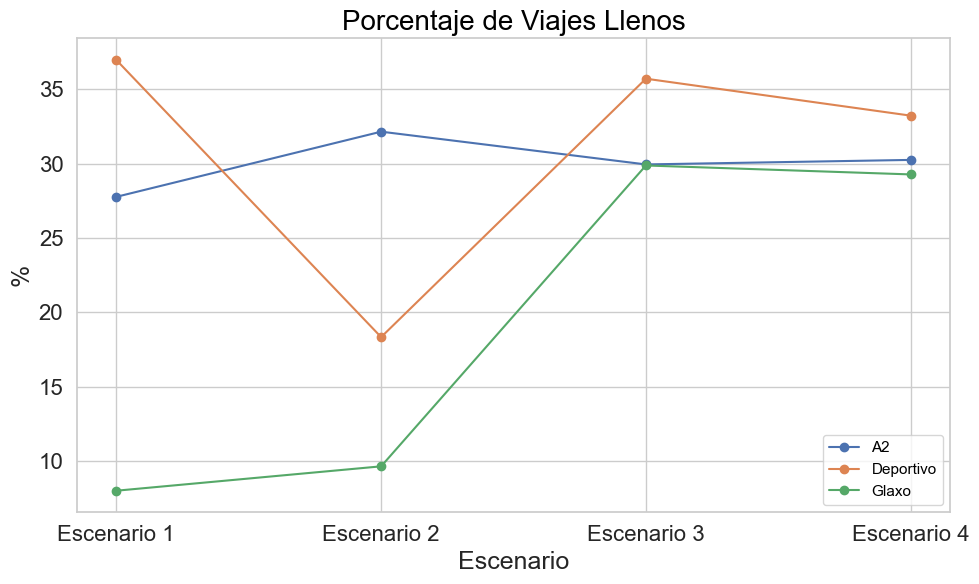

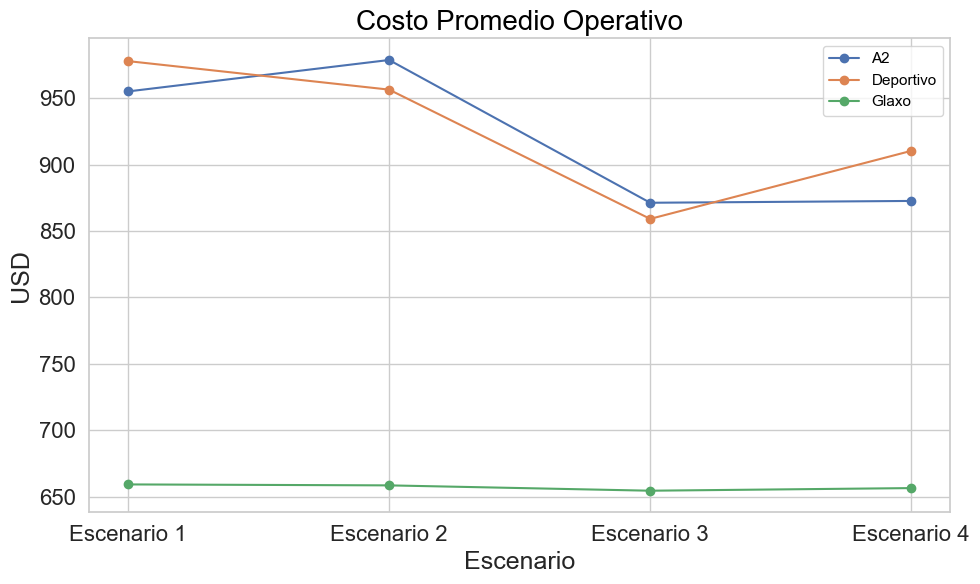

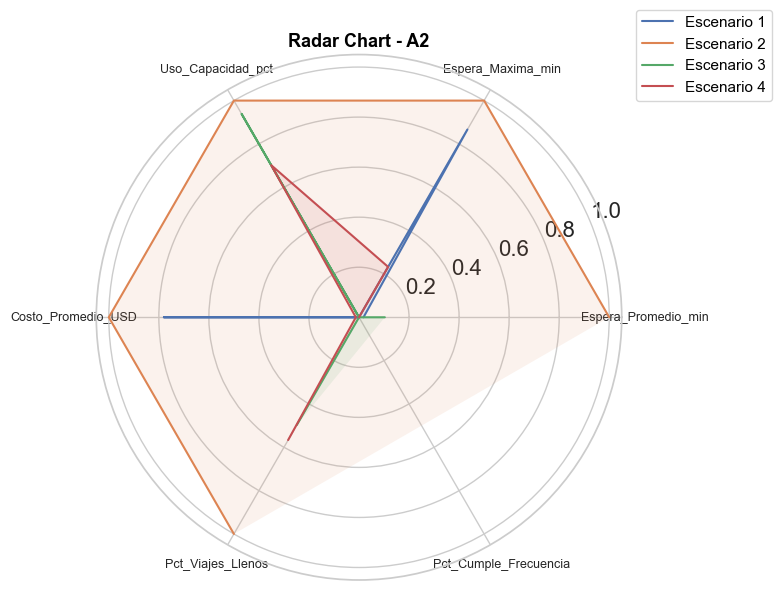

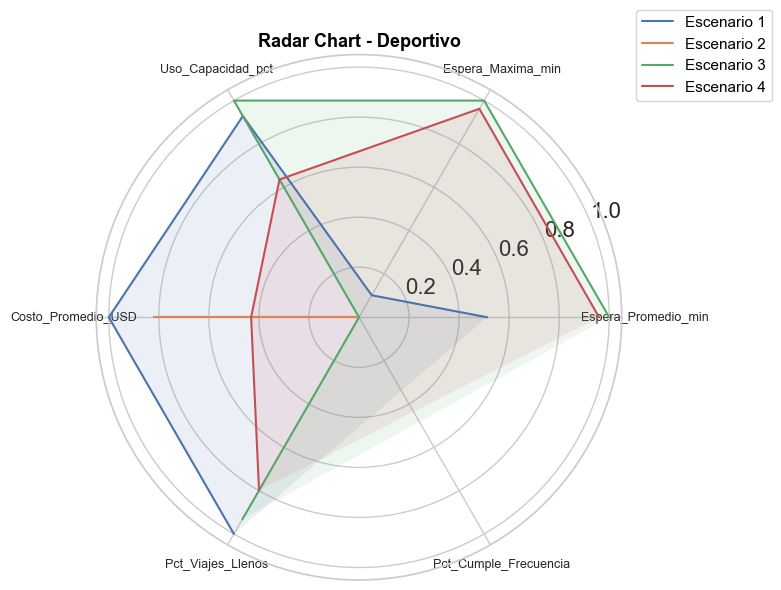

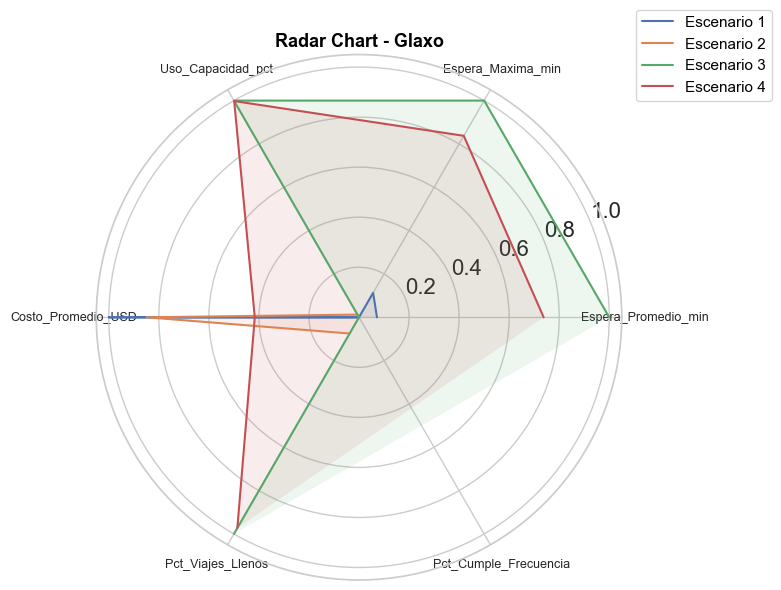

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns
import os


# Archivos a comparar (deben estar en la misma carpeta)
archivos = {
    "Escenario 1": "Es7_MejorResultado1Glaxomenortiempo.xlsx",
    "Escenario 2": "Es8_Mod1van.xlsx",
    "Escenario 3": "Esc9_CombinacionDA.xlsx",
    "Escenario 4": "Esc10_CombinacionDA_MejorResultado.xlsx"
}

# Cargar hojas "RESUMEN"
datos = {}
for nombre, archivo in archivos.items():
    df = pd.read_excel(archivo, sheet_name="RESUMEN")
    df["Escenario"] = nombre
    datos[nombre] = df

# Unir todo en un solo DataFrame
df_total = pd.concat(datos.values(), ignore_index=True)

# Función para crear una gráfica de barras
def graficar_barras(variable, titulo, ylabel):
    plt.figure(figsize=(10, 6))
    for estacion in df_total['Estacion'].unique():
        subset = df_total[df_total['Estacion'] == estacion]
        plt.plot(subset['Escenario'], subset[variable], marker='o', label=estacion)
    plt.title(titulo)
    plt.xlabel("Escenario")
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 1. Espera promedio
graficar_barras("Espera_Promedio_min", "Tiempo de Espera Promedio", "Minutos")

# 2. Espera máxima
graficar_barras("Espera_Maxima_min", "Tiempo de Espera Máximo", "Minutos")

# 3. Uso de capacidad
graficar_barras("Uso_Capacidad_pct", "Uso de Capacidad", "Porcentaje (%)")

# 4. Porcentaje de viajes llenos
graficar_barras("Pct_Viajes_Llenos", "Porcentaje de Viajes Llenos", "%")

# 5. Costo promedio
graficar_barras("Costo_Promedio_USD", "Costo Promedio Operativo", "USD")

# 6. Radar Chart por estación (solo para A2, Deportivo y Glaxo)
estaciones = df_total['Estacion'].unique()
metricas = [
    'Espera_Promedio_min',
    'Espera_Maxima_min',
    'Uso_Capacidad_pct',
    'Costo_Promedio_USD',
    'Pct_Viajes_Llenos',
    'Pct_Cumple_Frecuencia'
]

for estacion in estaciones:
    df_estacion = df_total[df_total['Estacion'] == estacion].set_index('Escenario')[metricas]
    df_norm = (df_estacion - df_estacion.min()) / (df_estacion.max() - df_estacion.min())
    angles = [n / float(len(metricas)) * 2 * pi for n in range(len(metricas))]
    angles += angles[:1]

    plt.figure(figsize=(8, 6))
    for esc in df_norm.index:
        values = df_norm.loc[esc].tolist()
        values += values[:1]
        plt.polar(angles, values, label=esc)
        plt.fill(angles, values, alpha=0.1)

    plt.xticks(angles[:-1], metricas, fontsize=9)
    plt.title(f"Radar Chart - {estacion}", fontsize=13, fontweight='bold')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    plt.show()


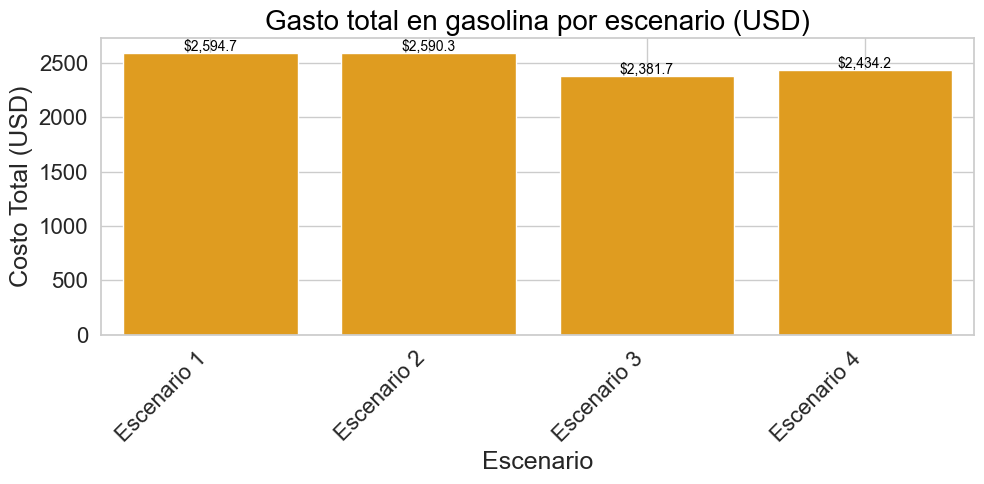

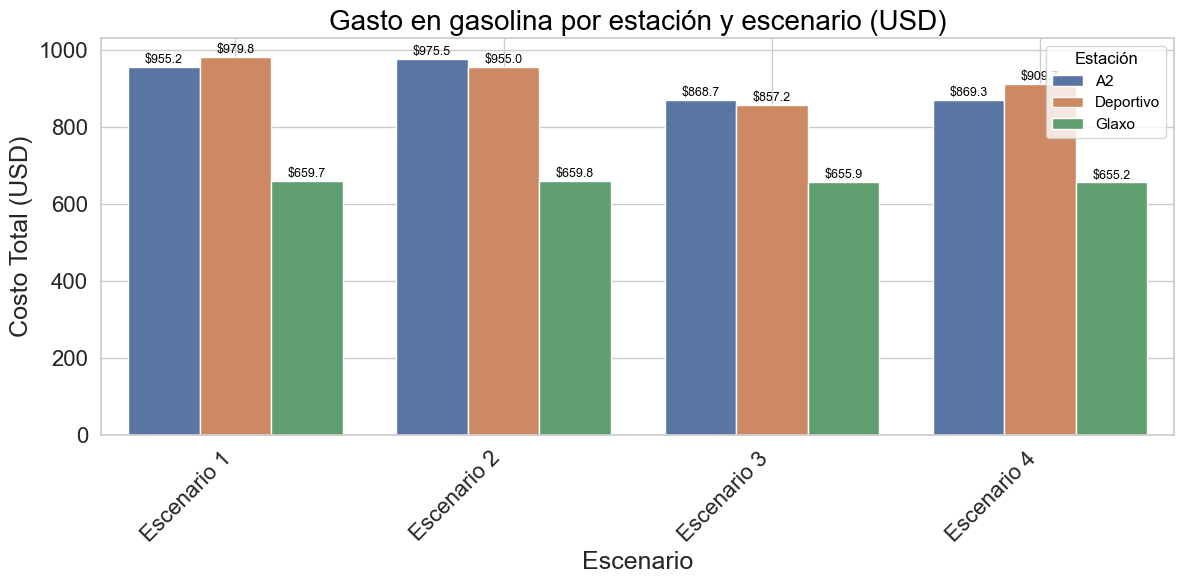

In [99]:


# Diccionario para renombrar escenarios
archivo_a_escenario = {
    "Es7_MejorResultado1Glaxomenortiempo": "Escenario 1",
    "Es8_Mod1van": "Escenario 2",
    "Esc9_CombinacionDA": "Escenario 3",
    "Esc10_CombinacionDA_MejorResultado": "Escenario 4"
}

# Leer archivo
df = pd.read_excel("Resumen_Todos_Escenarios.xlsx")

# Aplicar renombramiento
df["Escenario"] = df["Escenario"].replace(archivo_a_escenario)

# ===============================
# Gasto total por escenario
# ===============================
df_gas_total = df.groupby("Escenario")["Costo_Promedio_USD"].sum().reset_index()

plt.figure(figsize=(10, 5))
ax1 = sns.barplot(data=df_gas_total, x="Escenario", y="Costo_Promedio_USD", color="orange")

for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f"${height:,.1f}",
                 (p.get_x() + p.get_width() / 2., height + 20),
                 ha='center', fontsize=10)

plt.title("Gasto total en gasolina por escenario (USD)")
plt.ylabel("Costo Total (USD)")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

# ===============================
# Gasto por estación y escenario
# ===============================
df_gas_estacion = df.groupby(["Escenario", "Estacion"])["Costo_Promedio_USD"].sum().reset_index()

plt.figure(figsize=(12, 6))
ax2 = sns.barplot(data=df_gas_estacion, x="Escenario", y="Costo_Promedio_USD", hue="Estacion")

for p in ax2.patches:
    height = p.get_height()
    if height > 0:
        ax2.annotate(f"${height:,.1f}",
                     (p.get_x() + p.get_width() / 2., height + 10),
                     ha='center', fontsize=9)

plt.title("Gasto en gasolina por estación y escenario (USD)")
plt.ylabel("Costo Total (USD)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Estación")
plt.grid(True)
plt.tight_layout()
plt.show()


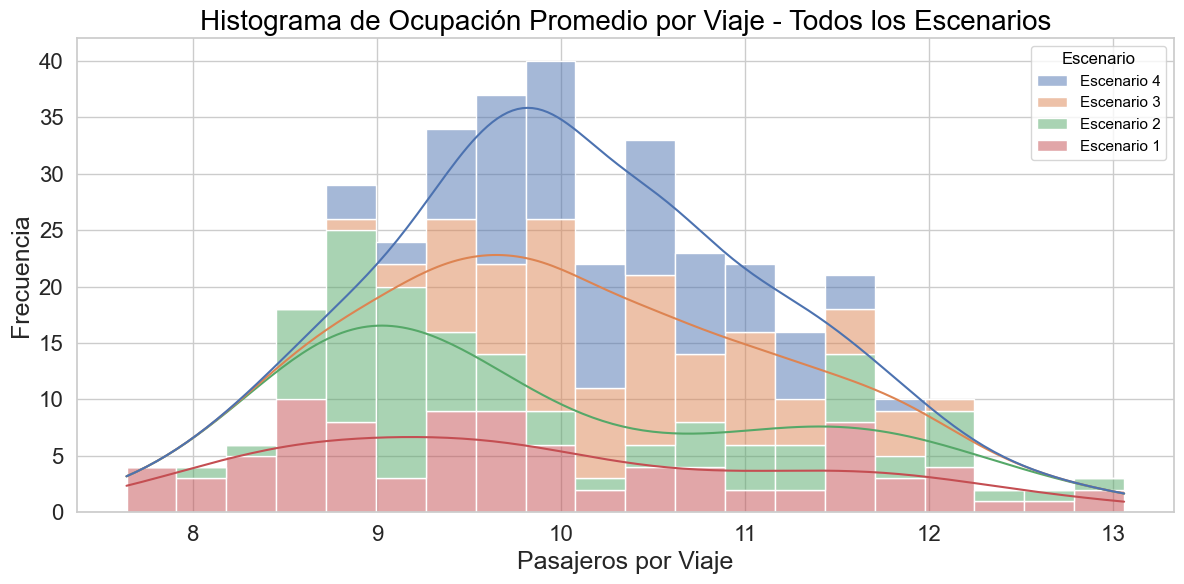

In [100]:

# Mapeo de nombres de archivo a nombres de escenario
archivo_a_escenario = {
    "Es7_MejorResultado1Glaxomenortiempo.xlsx": "Escenario 1",
    "Es8_Mod1van.xlsx": "Escenario 2",
    "Esc9_CombinacionDA.xlsx": "Escenario 3",
    "Esc10_CombinacionDA_MejorResultado.xlsx": "Escenario 4"
}

# Ruta local donde están los archivos .xlsx
carpeta = "."
archivos = [f for f in os.listdir(carpeta) if f in archivo_a_escenario]

# Cargar y combinar datos
df_ocupacion_total = pd.DataFrame()

for archivo in archivos:
    ruta = os.path.join(carpeta, archivo)
    xls = pd.ExcelFile(ruta)

    hojas_sim = [h for h in xls.sheet_names if h != "RESUMEN"]

    for hoja in hojas_sim:
        df = pd.read_excel(xls, sheet_name=hoja)

        if "Pasajeros_Transportados_Promedio" in df.columns:
            df["Estacion"] = hoja.split("_")[0]
            df["Escenario"] = archivo_a_escenario[archivo]
            df_ocupacion_total = pd.concat([df_ocupacion_total, df], ignore_index=True)

# ===============================
# Histograma de ocupación total
# ===============================
plt.figure(figsize=(12, 6))
sns.histplot(data=df_ocupacion_total, 
             x="Pasajeros_Transportados_Promedio", 
             hue="Escenario", 
             bins=20, 
             kde=True, 
             multiple="stack")

plt.title("Histograma de Ocupación Promedio por Viaje - Todos los Escenarios")
plt.xlabel("Pasajeros por Viaje")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()


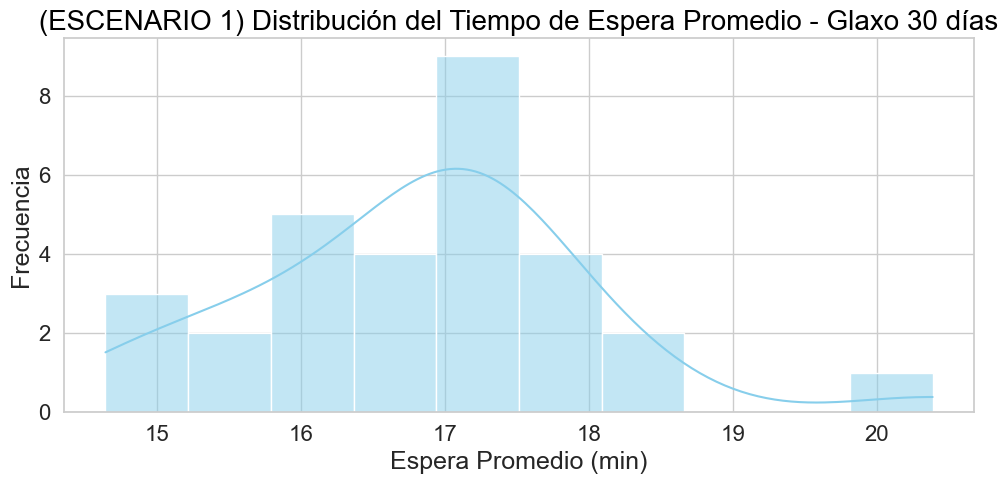

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta al archivo
archivo = "Es7_MejorResultado1Glaxomenortiempo.xlsx"

# Lista para guardar todos los tiempos de espera de las 30 réplicas
esperas = []

# Iterar sobre las 30 hojas (R01 a R30)
for i in range(1, 31):
    hoja = f"Glaxo_R{str(i).zfill(2)}"
    df = pd.read_excel(archivo, sheet_name=hoja)
    
    # Extraer el valor de 'Tiempo_Espera_Promedio_min'
    if 'Tiempo_Espera_Promedio_min' in df.columns:
        valor = df['Tiempo_Espera_Promedio_min'].iloc[0]
        esperas.append(valor)

# Crear un DataFrame con todos los valores
df_espera = pd.DataFrame({'Espera_Promedio_min': esperas})

# Graficar la distribución
plt.figure(figsize=(10, 5))
sns.histplot(df_espera['Espera_Promedio_min'], bins=10, kde=True, color='skyblue')
plt.title('(ESCENARIO 1) Distribución del Tiempo de Espera Promedio - Glaxo 30 días')
plt.xlabel('Espera Promedio (min)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()



In [102]:
import pandas as pd
import plotly.express as px

# Cargar datos desde el archivo
df = pd.read_excel("Es7_MejorResultado1Glaxomenortiempo.xlsx", sheet_name="RESUMEN")

# Redondear valores para que se vean bien
df["Costo_Promedio_USD"] = df["Costo_Promedio_USD"].round(1)

# Crear la gráfica de barras verticales
fig = px.bar(
    df,
    x="Estacion",
    y="Costo_Promedio_USD",
    text="Costo_Promedio_USD",
    title="Costo Promedio Operativo - Escenario 1",
    color_discrete_sequence=["lightcoral"]
)

# Configurar visualización del texto
fig.update_traces(
    textposition="outside",
    textfont=dict(size=25, color="black"),
    cliponaxis=False  # Asegura que no se corten los textos
)

# Ajustar diseño general
fig.update_layout(
    yaxis_title="Costo Promedio (USD)",
    xaxis_title="Estación",
    title_font_size=25,
    xaxis_tickfont=dict(size=25),  # Tamaño de texto en nombres de estaciones
)

# Mostrar
fig.show()




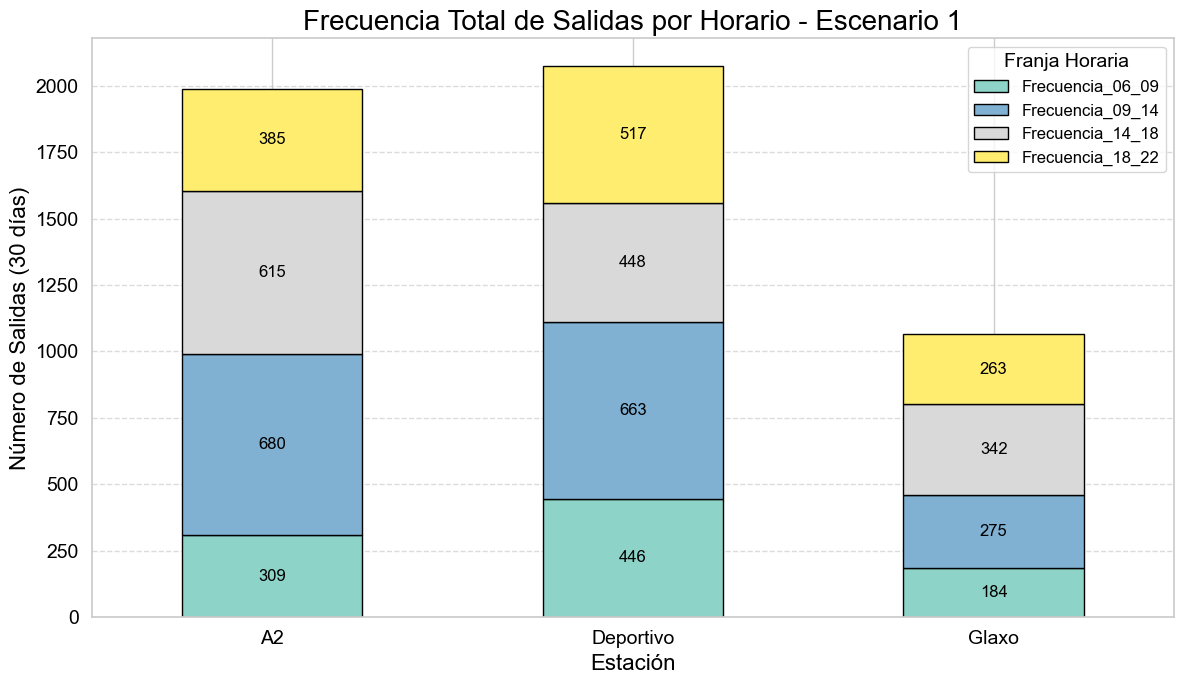

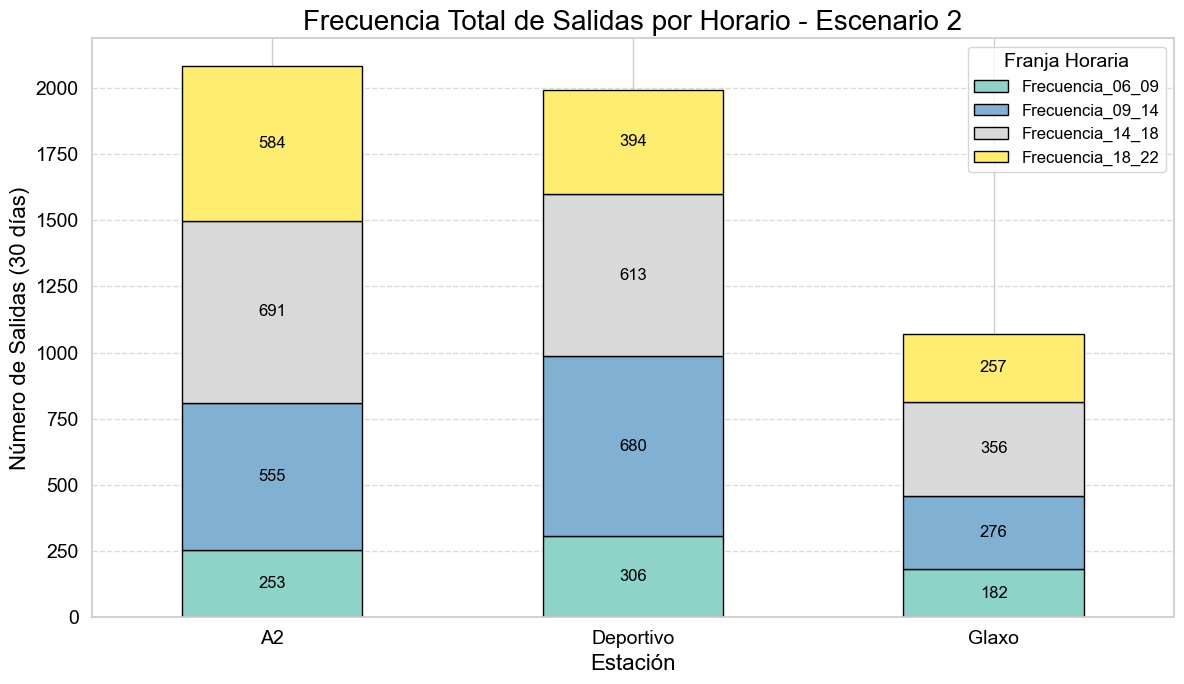

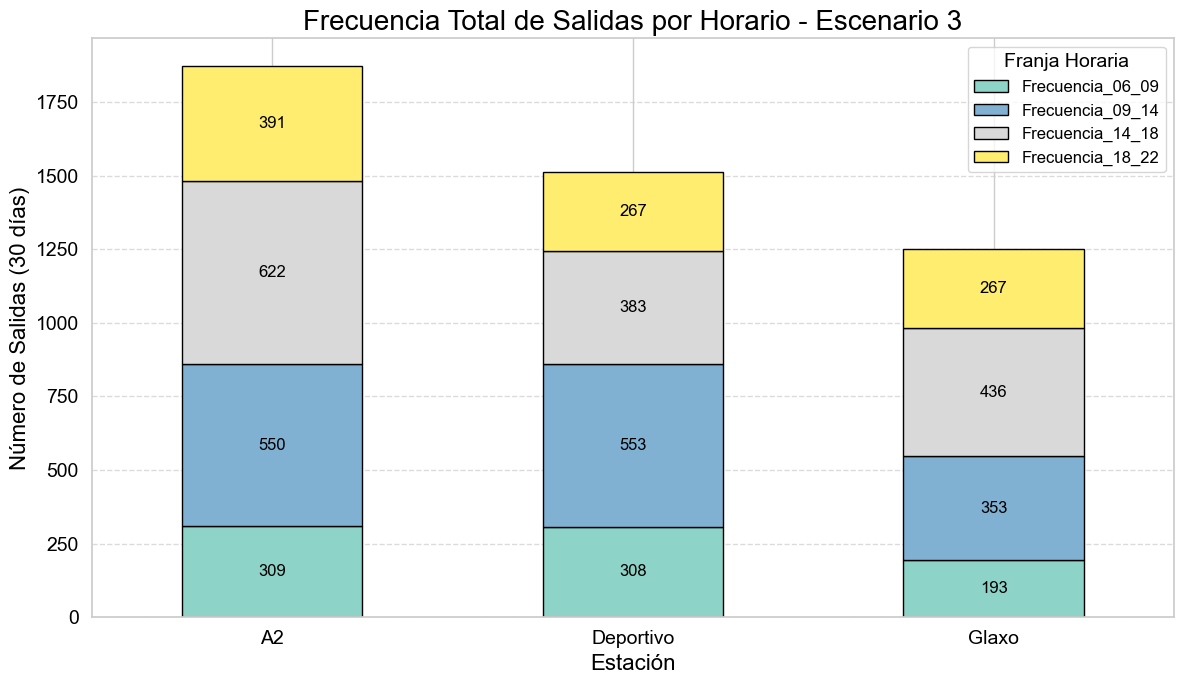

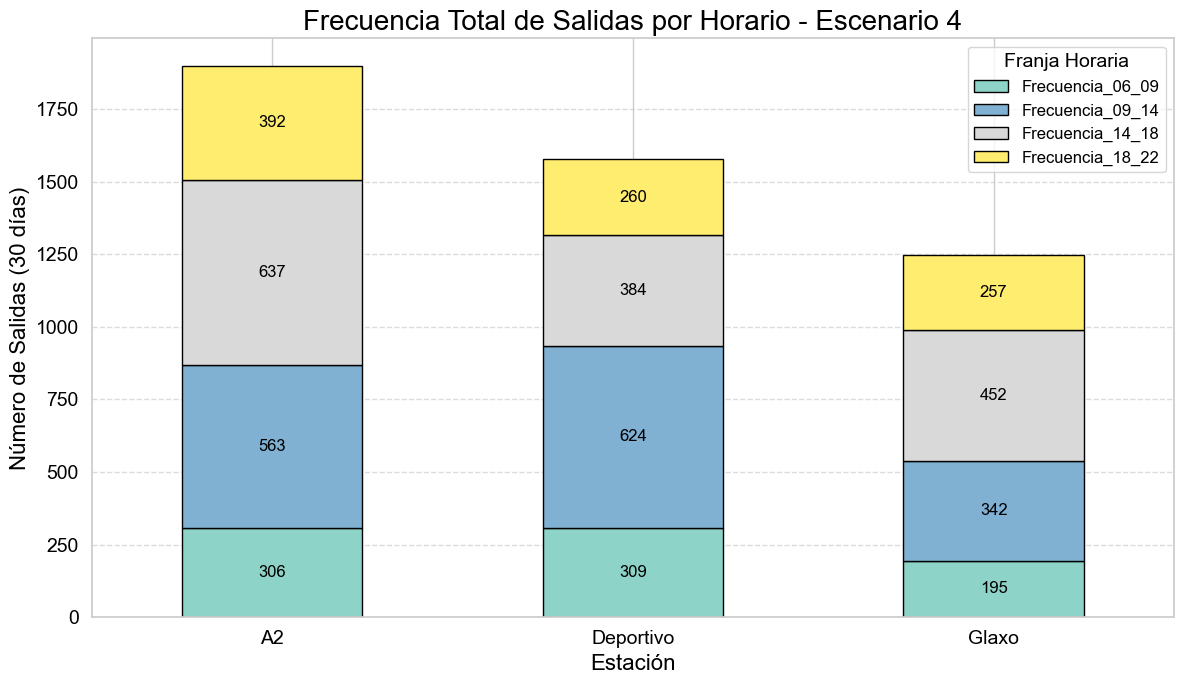

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# Archivos y nombres de escenarios
files = {
    "Escenario 1": "Es7_MejorResultado1Glaxomenortiempo.xlsx",
    "Escenario 2": "Es8_Mod1van.xlsx",
    "Escenario 3": "Esc9_CombinacionDA.xlsx",
    "Escenario 4": "Esc10_CombinacionDA_MejorResultado.xlsx",
}

def graficar_frecuencia_por_escenario(nombre, path):
    xls = pd.ExcelFile(path)
    hojas_simulaciones = [h for h in xls.sheet_names if any(est in h for est in ["Deportivo", "Glaxo", "A2"])]
    
    df_all = pd.concat([
        pd.read_excel(xls, sheet_name=hoja).assign(Estacion=hoja.split("_")[0])
        for hoja in hojas_simulaciones
    ])
    
    df_freq = df_all.groupby("Estacion")[[
        "Frecuencia_06_09", "Frecuencia_09_14", "Frecuencia_14_18", "Frecuencia_18_22"
    ]].sum().reset_index()
    
    ax = df_freq.set_index("Estacion").plot(
        kind="bar", stacked=True, figsize=(12, 7), colormap="Set3", edgecolor="black"
    )
    
    plt.title(f"Frecuencia Total de Salidas por Horario - {nombre}", fontsize=20, color='black')
    plt.ylabel("Número de Salidas (30 días)", fontsize=16, color='black')
    plt.xlabel("Estación", fontsize=16, color='black')
    plt.xticks(rotation=0, fontsize=14, color='black')
    plt.yticks(fontsize=14, color='black')
    plt.legend(title="Franja Horaria", title_fontsize=14, fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='center', fontsize=12, color='black')

    plt.tight_layout()
    plt.show()

# Ejecutar para cada escenario
for nombre, ruta in files.items():
    graficar_frecuencia_por_escenario(nombre, ruta)


/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_31910/328338502.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




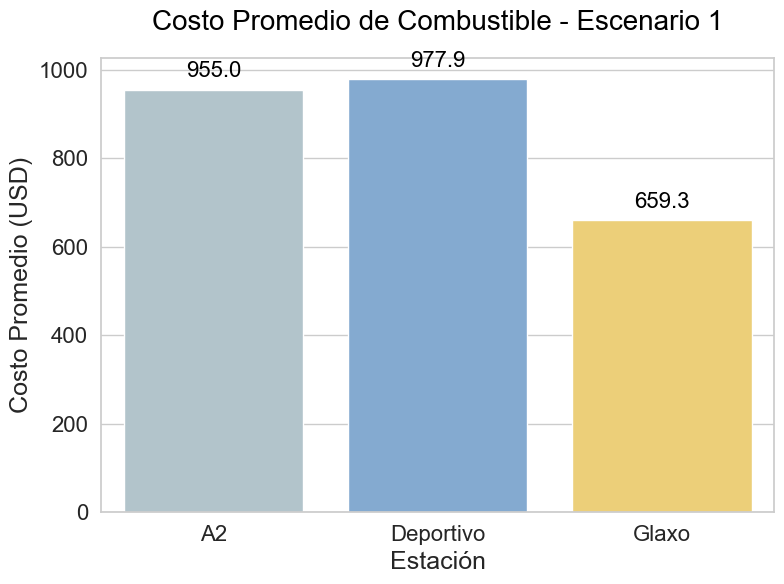

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_31910/328338502.py:50: UserWarning:

The palette list has more values (3) than needed (2), which may not be intended.



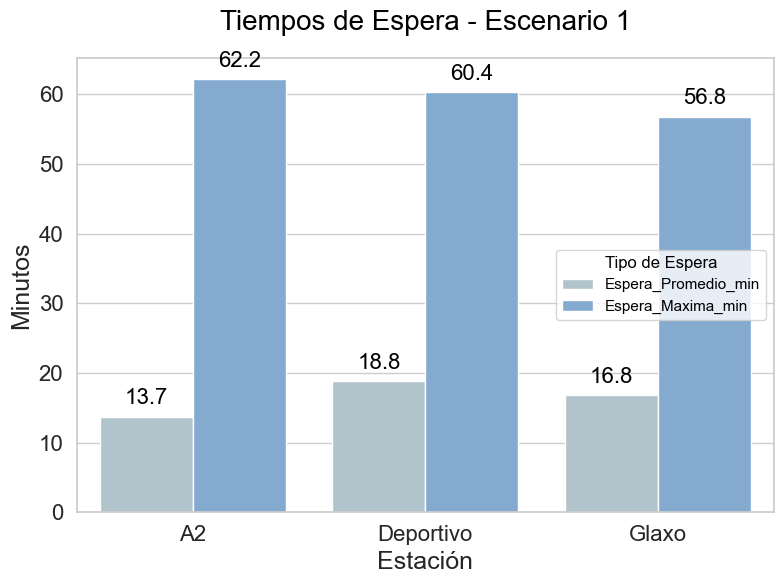

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_31910/328338502.py:62: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




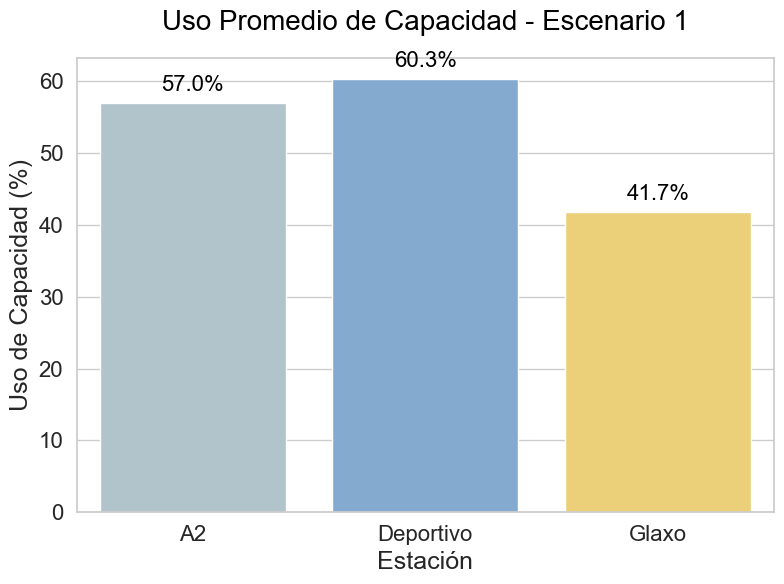

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_31910/328338502.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




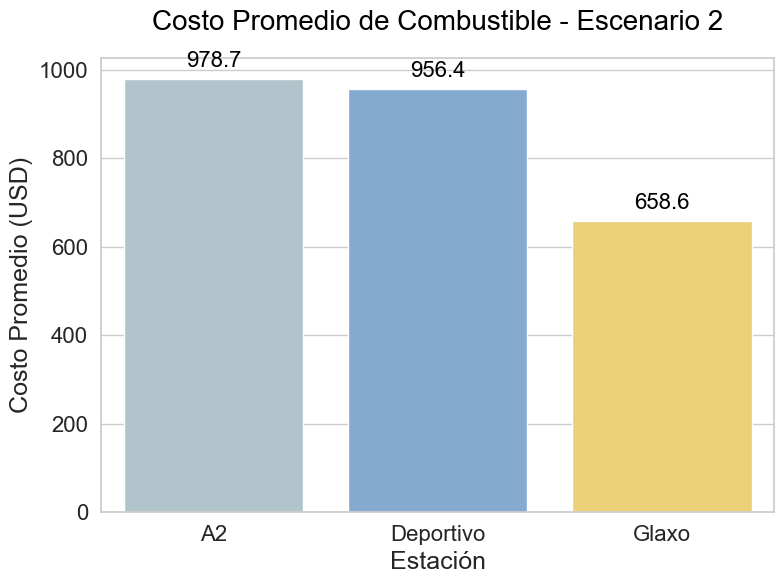

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_31910/328338502.py:50: UserWarning:

The palette list has more values (3) than needed (2), which may not be intended.



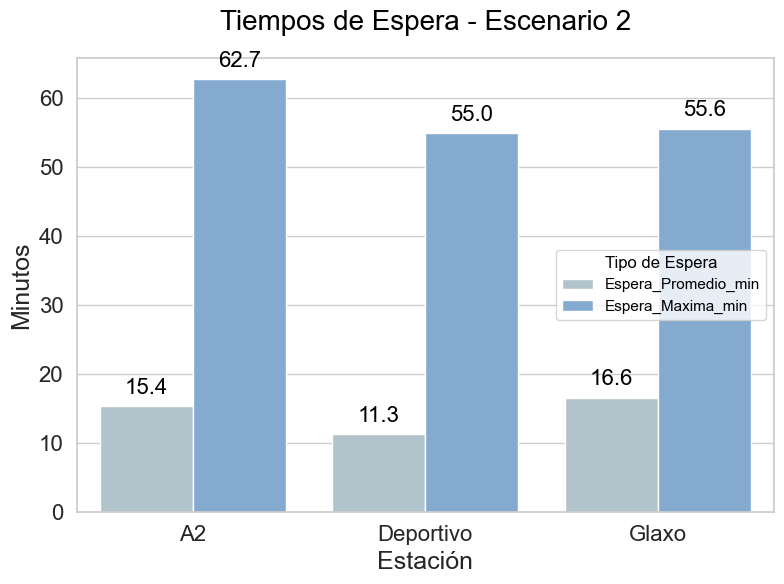

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_31910/328338502.py:62: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




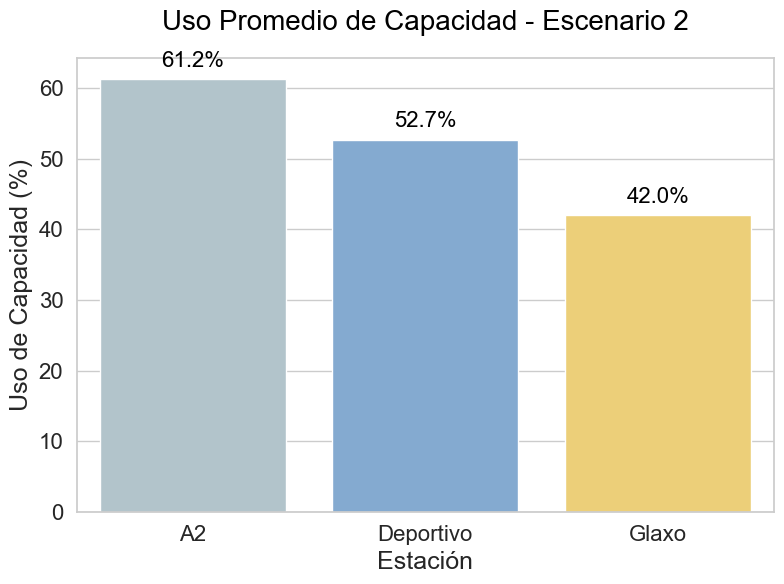

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_31910/328338502.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




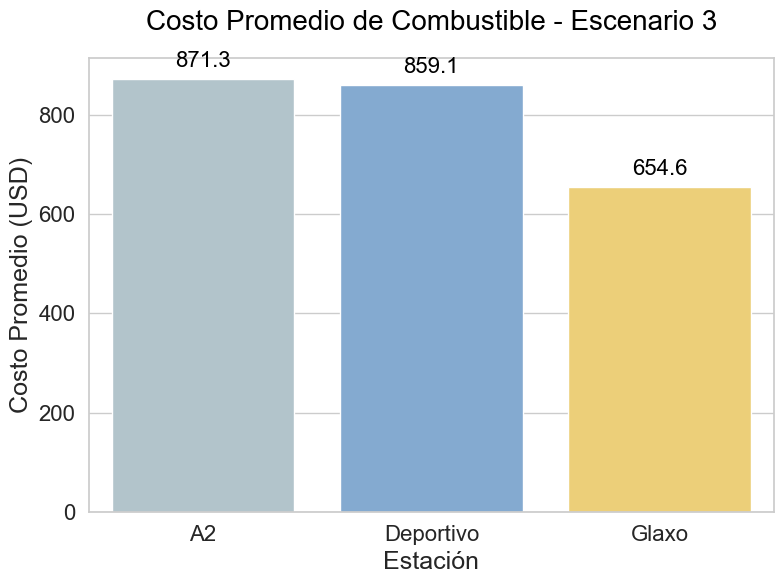

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_31910/328338502.py:50: UserWarning:

The palette list has more values (3) than needed (2), which may not be intended.



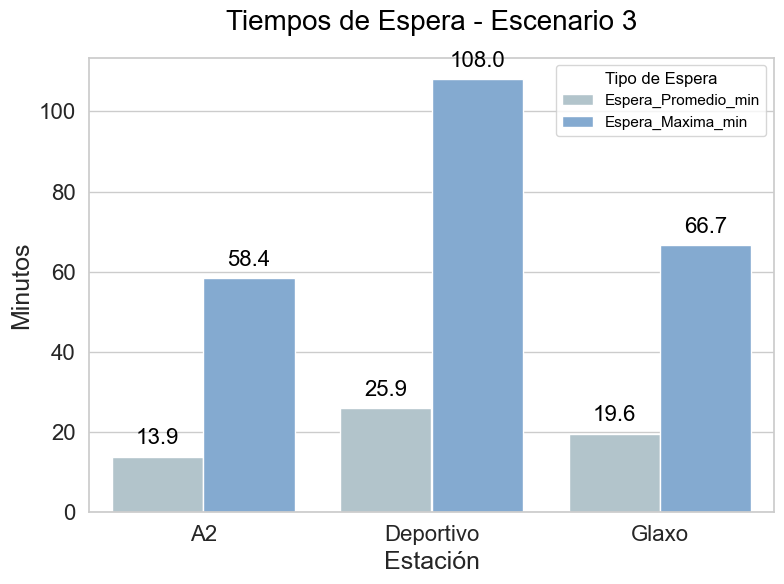

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_31910/328338502.py:62: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




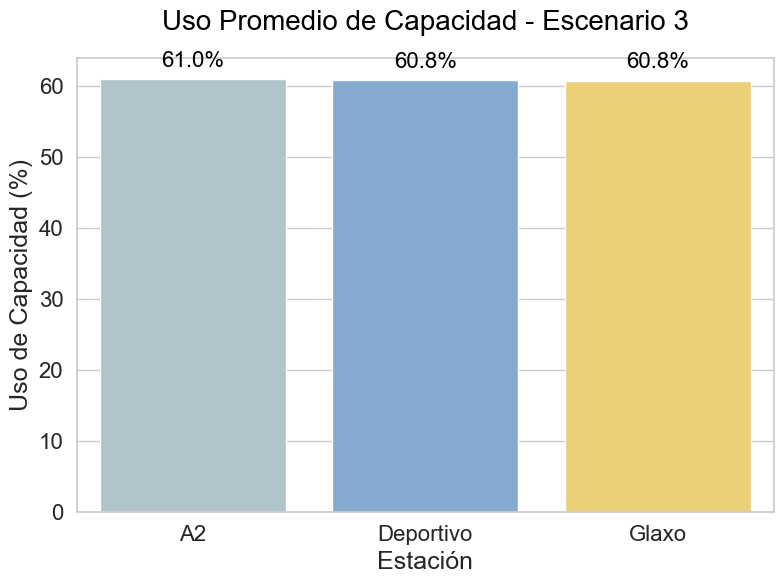

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_31910/328338502.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




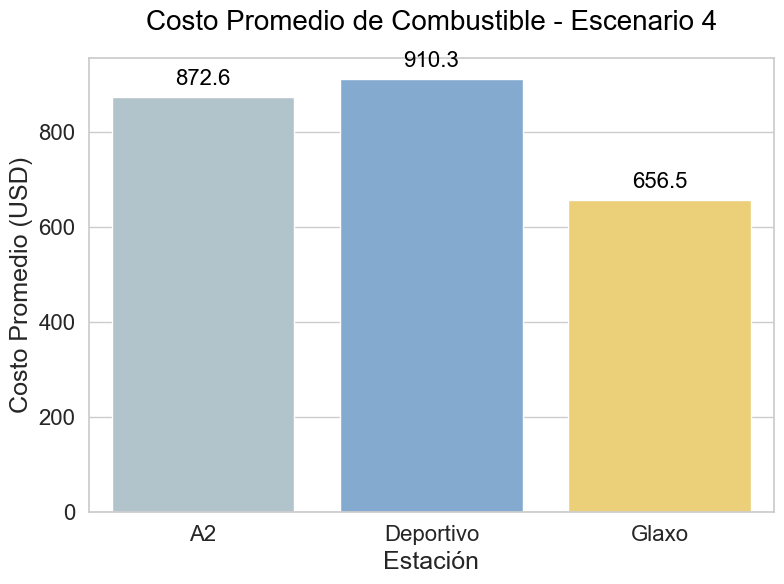

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_31910/328338502.py:50: UserWarning:

The palette list has more values (3) than needed (2), which may not be intended.



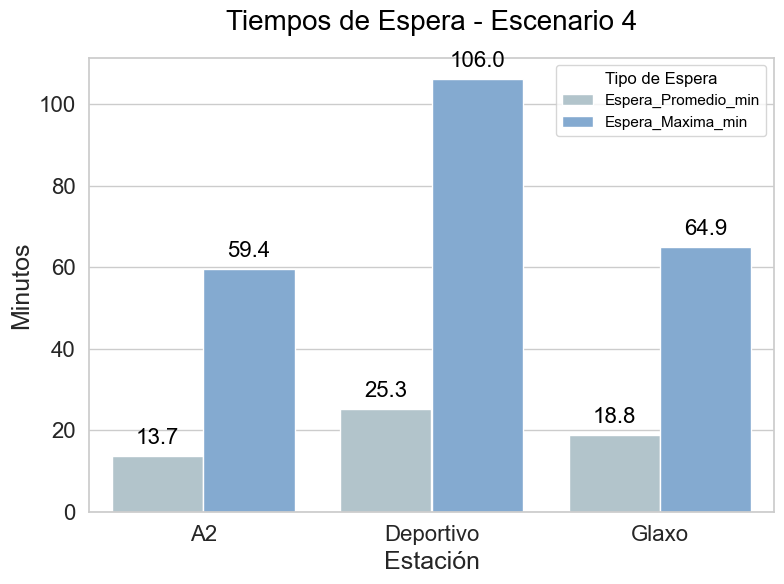

/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_31910/328338502.py:62: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




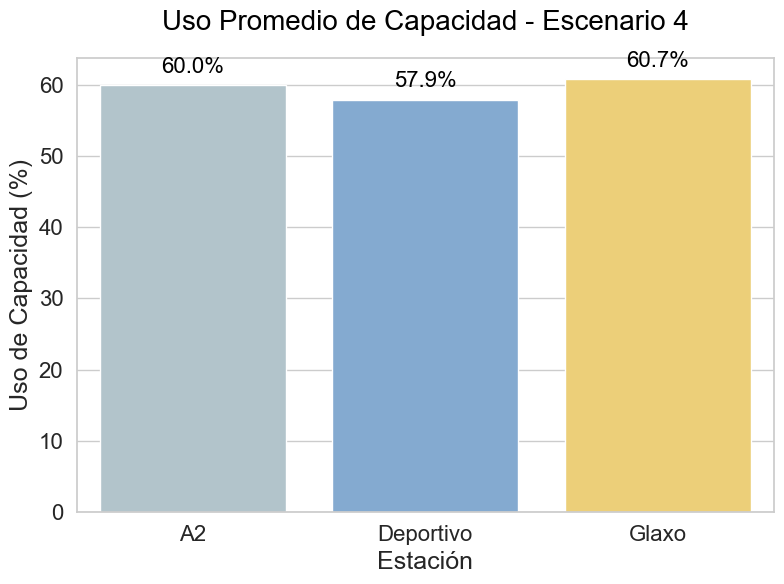

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Rutas de los archivos por escenario
archivos = {
    "Escenario 1": "Es7_MejorResultado1Glaxomenortiempo.xlsx",
    "Escenario 2": "Es8_Mod1van.xlsx",
    "Escenario 3": "Esc9_CombinacionDA.xlsx",
    "Escenario 4": "Esc10_CombinacionDA_MejorResultado.xlsx"
}

# Estilo general
sns.set(style="whitegrid")
plt.rcParams.update({
    "axes.titlesize": 20,
    "axes.labelsize": 18,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "text.color": "black"
})

# Paleta de colores pastel
colors = ["#AEC6CF", "#77AADD", "#FFD966"]

# Cargar y procesar datos
data_escenarios = {}
for nombre, ruta in archivos.items():
    df = pd.read_excel(ruta, sheet_name="RESUMEN")
    df["Escenario"] = nombre
    data_escenarios[nombre] = df

# Generar 3 gráficos por escenario
for nombre, df in data_escenarios.items():
    # 1. Costo Promedio
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(data=df, x="Estacion", y="Costo_Promedio_USD", palette=colors)
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=16, color='black', padding=6)
    plt.title(f"Costo Promedio de Combustible - {nombre}", pad=20)
    plt.ylabel("Costo Promedio (USD)")
    plt.xlabel("Estación")
    plt.tight_layout()
    plt.show()

    # 2. Tiempos de Espera
    df_melt = df.melt(id_vars="Estacion", value_vars=["Espera_Promedio_min", "Espera_Maxima_min"],
                      var_name="Tipo", value_name="Minutos")
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(data=df_melt, x="Estacion", y="Minutos", hue="Tipo", palette=colors)
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=16, color='black', padding=6)
    plt.title(f"Tiempos de Espera - {nombre}", pad=20)
    plt.ylabel("Minutos")
    plt.xlabel("Estación")
    plt.legend(title="Tipo de Espera")
    plt.tight_layout()
    plt.show()

    # 3. Uso de Capacidad
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(data=df, x="Estacion", y="Uso_Capacidad_pct", palette=colors)
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=16, color='black', padding=6)
    plt.title(f"Uso Promedio de Capacidad - {nombre}", pad=20)
    plt.ylabel("Uso de Capacidad (%)")
    plt.xlabel("Estación")
    plt.tight_layout()
    plt.show()


/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_1498/1856870696.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_avg, x="Escenario", y="Uso_Capacidad_pct", palette=colors)


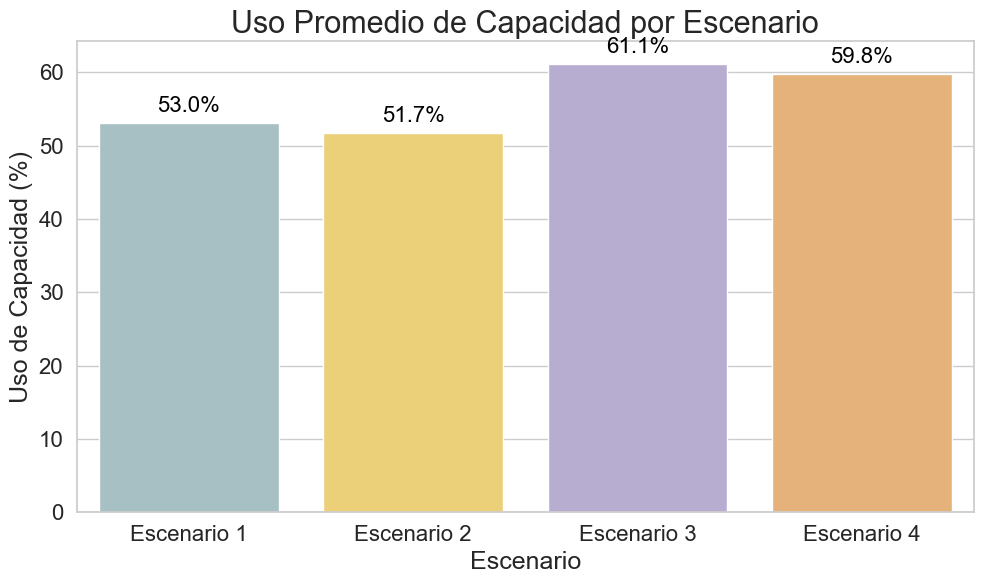

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
file_path = "Resumen_Todos_Escenarios.xlsx"
df = pd.read_excel(file_path)

# Traducir nombres a Escenario 1-4
escenario_map = {
    'Es7_MejorResultado1Glaxomenortiempo': 'Escenario 1',
    'Es8_Mod1van': 'Escenario 2',
    'Esc9_CombinacionDA': 'Escenario 3',
    'Esc10_CombinacionDA_MejorResultado': 'Escenario 4'
}
df["Escenario"] = df["Escenario"].map(escenario_map)

# Agrupar por escenario y obtener uso promedio de capacidad
df_avg = df.groupby("Escenario")["Uso_Capacidad_pct"].mean().reset_index()

# Graficar
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
colors = ["#A2C4C9", "#FFD966", "#B4A7D6", "#F6B26B"]  # Tonos pastel
ax = sns.barplot(data=df_avg, x="Escenario", y="Uso_Capacidad_pct", palette=colors)

# Etiquetas sobre las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=16, color='black', padding=5)

plt.title("Uso Promedio de Capacidad por Escenario", fontsize=22)
plt.ylabel("Uso de Capacidad (%)", fontsize=18)
plt.xlabel("Escenario", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()
